In [3]:
import numpy as np

from FRP_sensitivity import create_output_dir, log_sample, solve_odes, sensitivity_analysis
from FRP_sensitivity import save_params, save_ode_outputs, save_problem
from FRP_sensitivity import load_data, load_params, load_ode_outputs, load_problem
from FRP_sensitivity import plot_param_values, plot_ode_outputs, plot_sensitivity_grid

%load_ext autoreload
%autoreload 2

In [4]:
# Define output directory
output_dir = 'Experiments/FRP/0.85_0.15'
create_output_dir(output_dir)

Directory 'Experiments/FRP/0.85_0.15' already exists.


#### Define ODE Model

In [5]:
# Define parameter ranges
pbounds = [1e0, 1e2] # Propagation rate constant range
dbounds = [0.5e0, 0.5e2] # Depropagation rate constant range
frp_problem = {
    'num_vars': 5,
    'names': ['kpAA', 'kpAB', 'kpBA', 'kpBB', 'kdBB'],
    'bounds': [pbounds, pbounds, pbounds, pbounds, dbounds]
}
save_problem(frp_problem, output_dir)

#### Sample parameters

In [6]:
param_values = log_sample(frp_problem, 200)
print('Parameter values shape:', param_values.shape)

Parameter values shape: (2400, 5)


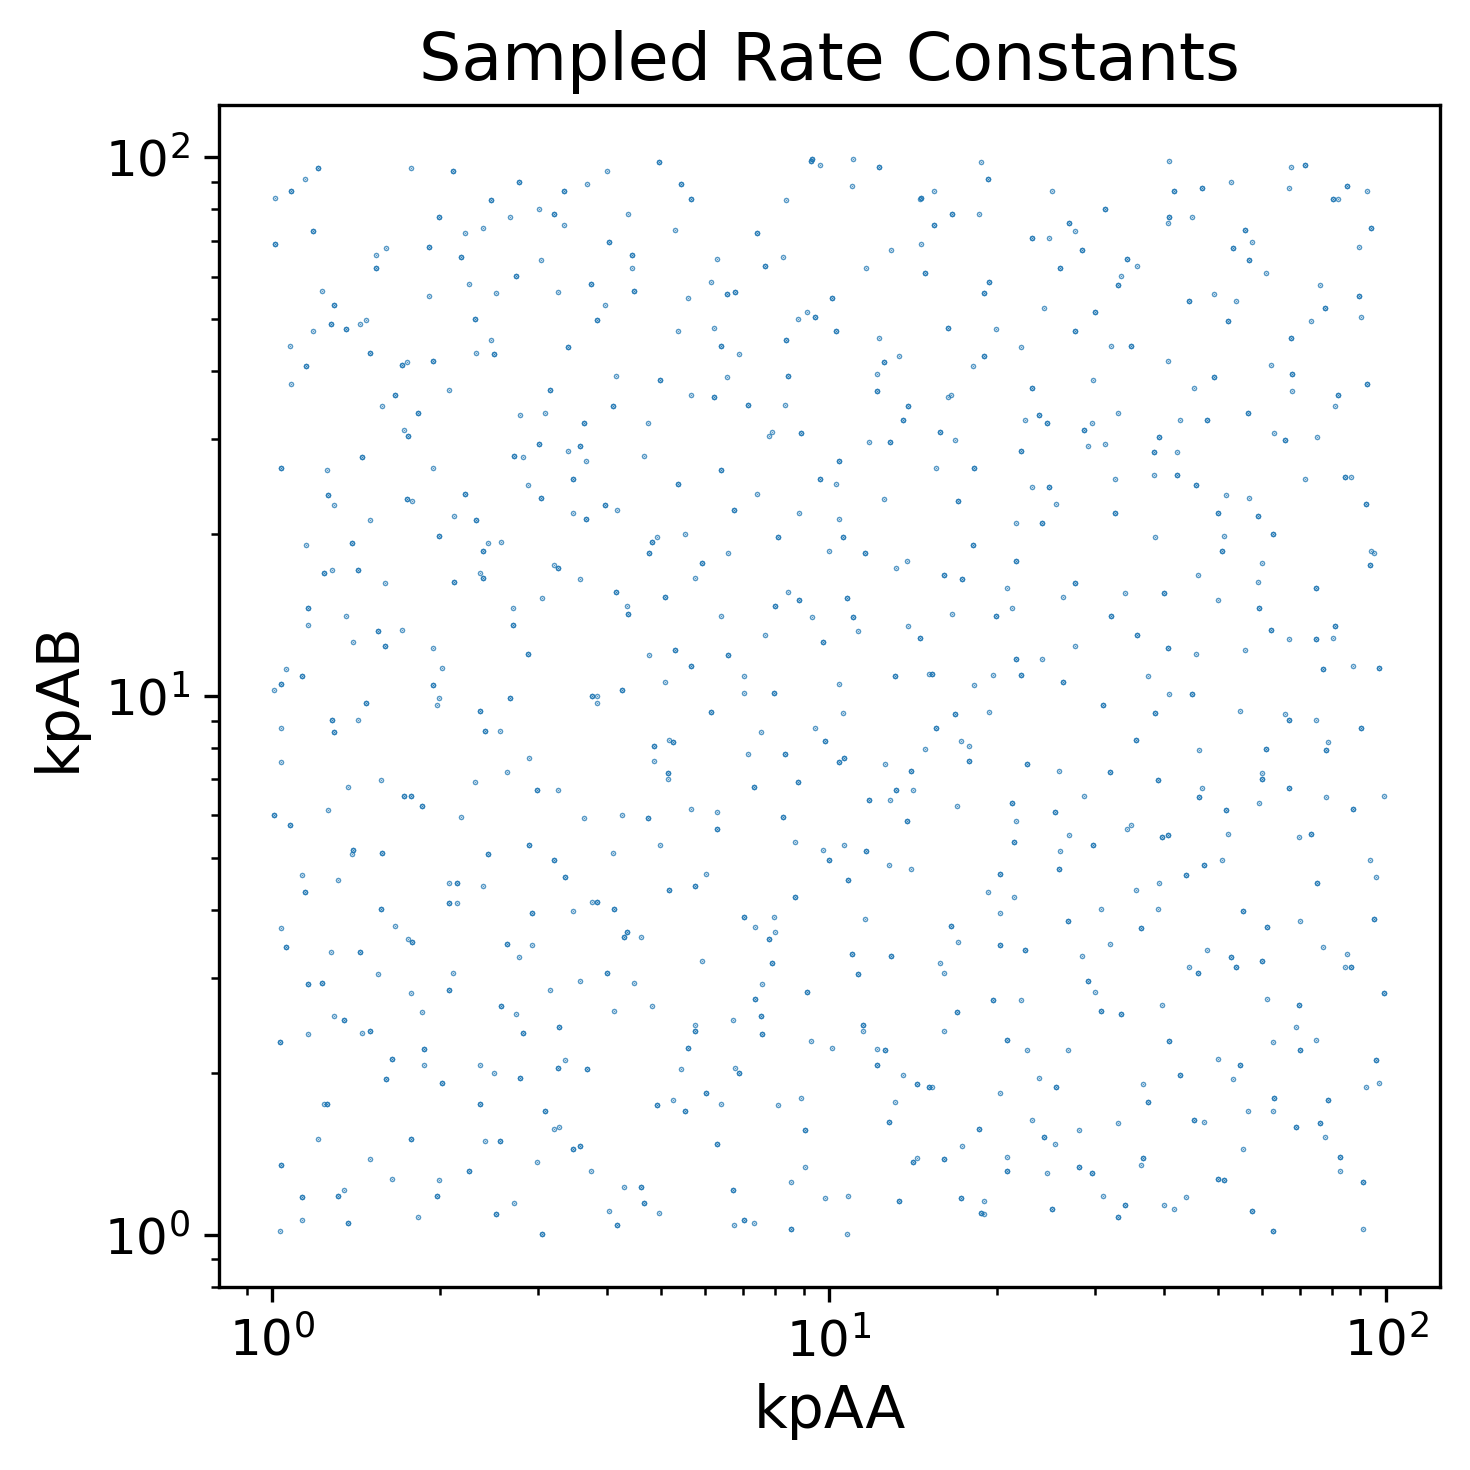

In [7]:
fig, ax = plot_param_values(param_values, 0, 1, names=frp_problem['names'])

In [8]:
save_params(param_values, output_dir)

#### Solve ODE Model for all parameters

In [9]:
# Define initial concentrations
I0 = 0.005
A0 = 2.55
B0 = 0.45

y0 = np.zeros(33)
y0[0] = I0
y0[2] = A0
y0[3] = B0

t, output_mat, output_names = solve_odes(param_values, time_points=20, y0=y0, tmax=200)
print('ODE outputs:', output_names)
print('Output matrix shape:', output_mat.shape)

33it [00:04,  6.98it/s]


KeyboardInterrupt: 

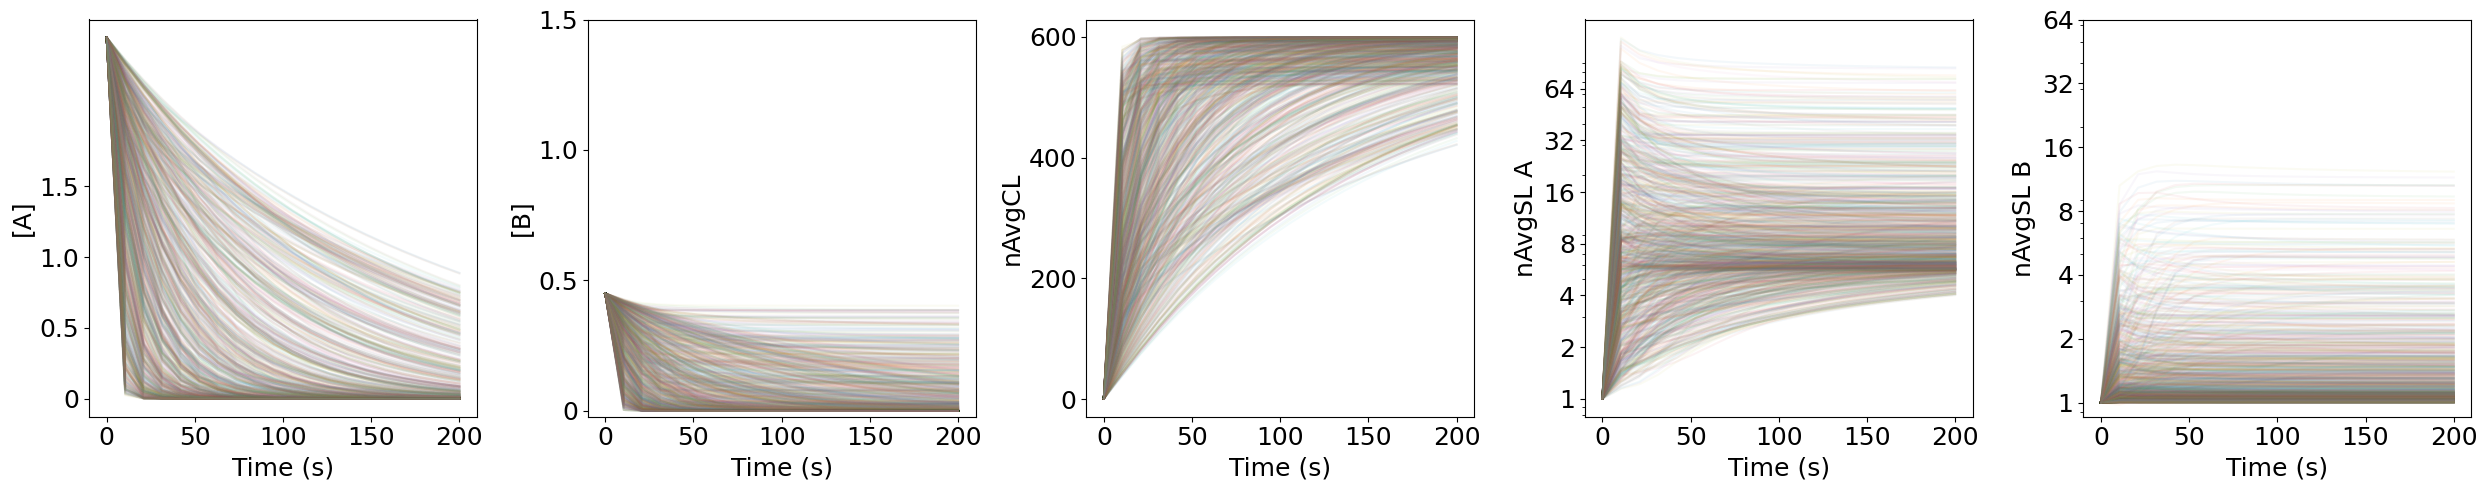

In [ ]:
fig, axs = plot_ode_outputs(output_mat, output_names, t=t)

In [ ]:
save_ode_outputs(output_mat, t, output_dir)

#### Perform sensitivity analysis

In [ ]:
dfs = sensitivity_analysis(frp_problem, t, output_mat, output_dir=output_dir)

Performing sensitivity analysis on output 0 ...


0it [00:00, ?it/s]

20it [00:00, 109.25it/s]


Performing sensitivity analysis on output 1 ...


20it [00:00, 150.39it/s]


Performing sensitivity analysis on output 2 ...


20it [00:00, 162.45it/s]


Performing sensitivity analysis on output 3 ...


20it [00:00, 82.78it/s]


Performing sensitivity analysis on output 4 ...


20it [00:00, 160.20it/s]


In [ ]:
fig, axs = plot_sensitivity_grid(frp_problem, dfs)

#### Load and plot data

In [ ]:
input_dir = output_dir

problem = load_problem(input_dir)
param_values = load_params(input_dir)
t, output_mat = load_ode_outputs(input_dir)
dfs = load_data(input_dir)

problem

{'num_vars': 5,
 'names': ['kpAA', 'kpAB', 'kpBA', 'kpBB', 'kdBB'],
 'bounds': [[1.0, 100.0],
  [1.0, 100.0],
  [1.0, 100.0],
  [1.0, 100.0],
  [0.5, 50.0]]}

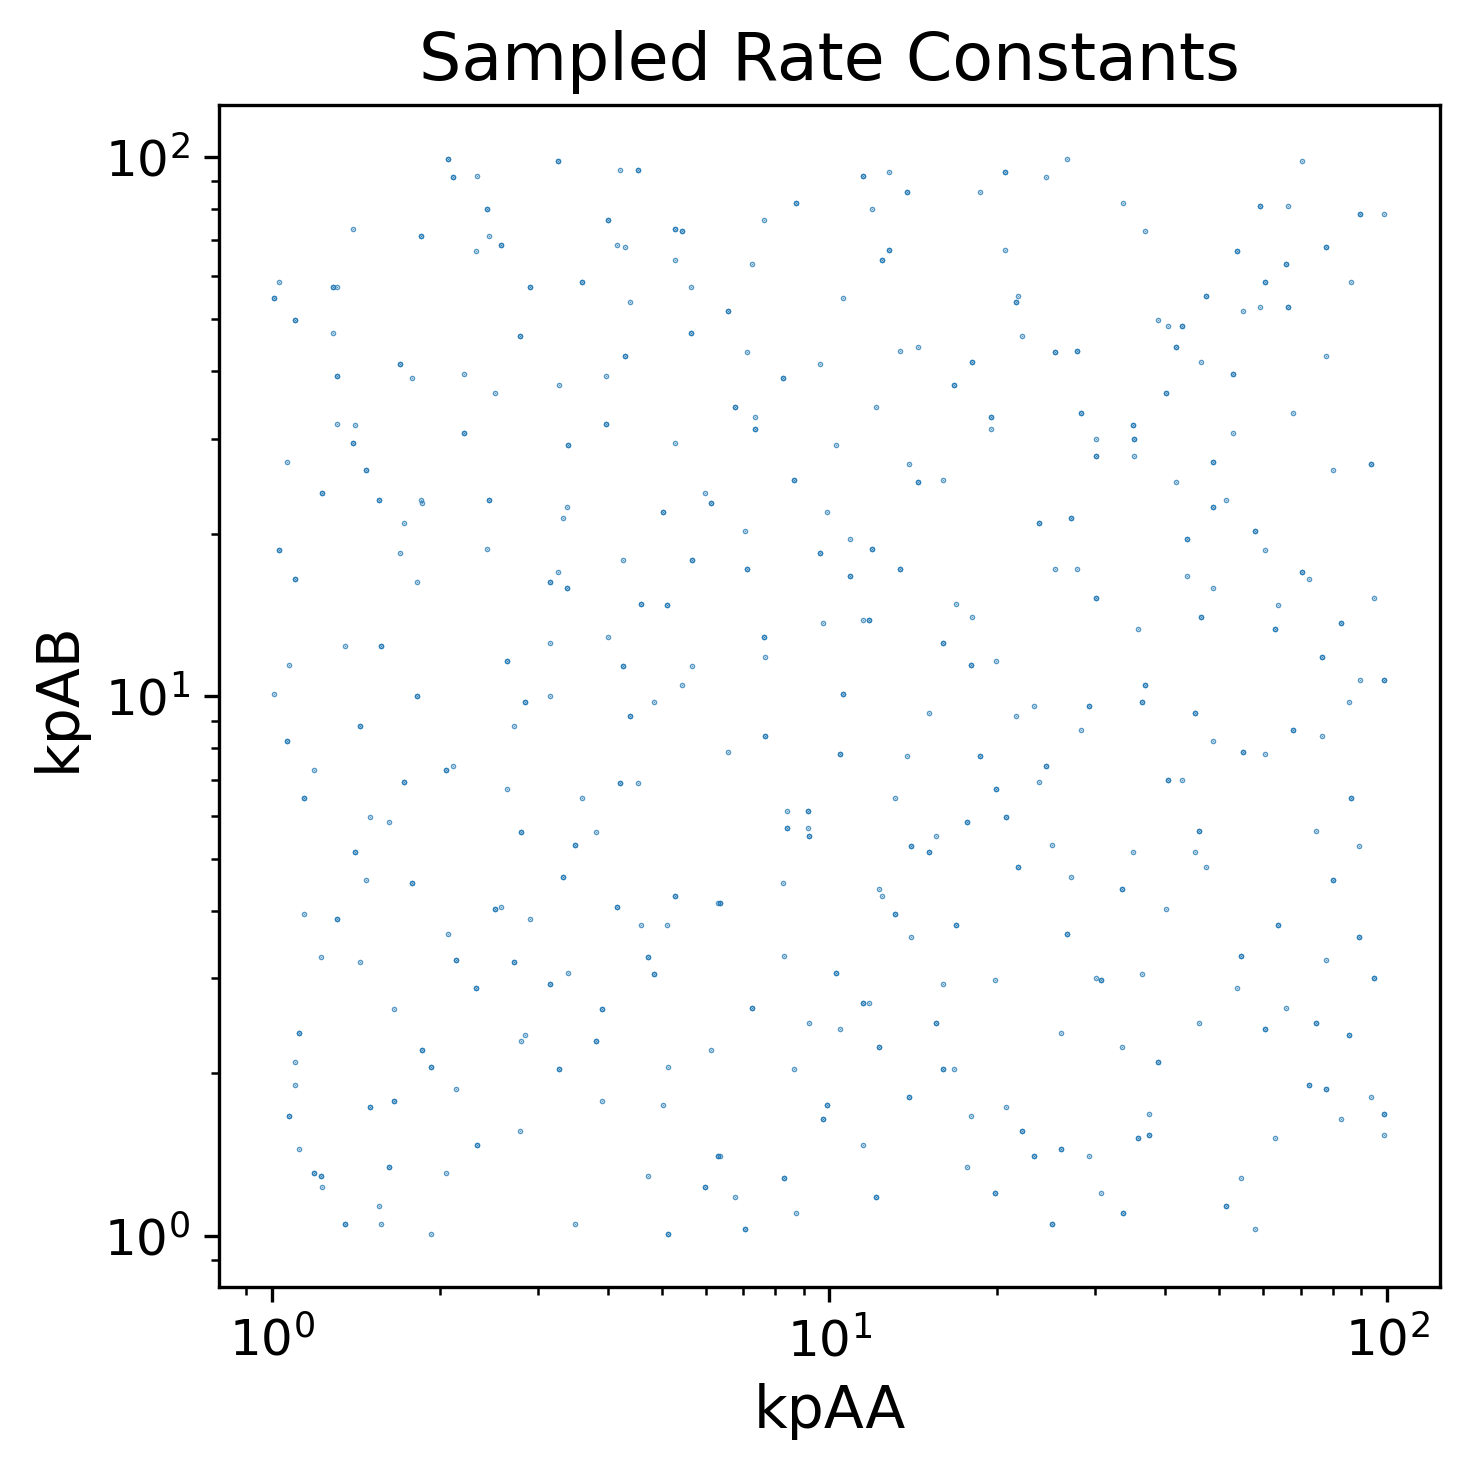

In [ ]:
fig, ax = plot_param_values(param_values, idx1=0, idx2=1, names=frp_problem['names'])

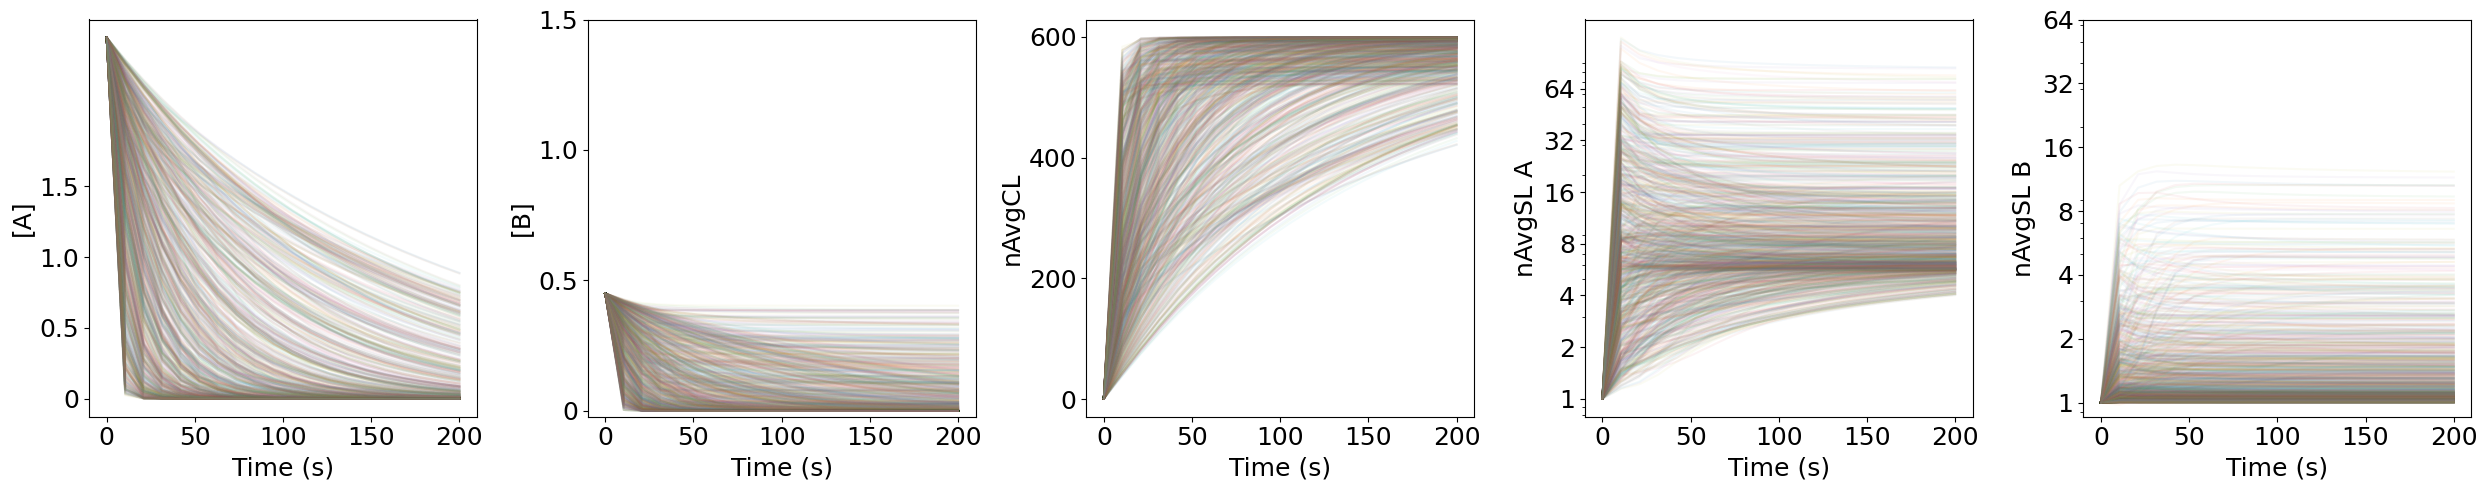

In [ ]:
fig, axs = plot_ode_outputs(output_mat, output_names, t=t)

In [ ]:
fig, axs = plot_sensitivity_grid(frp_problem, dfs)